In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_test_scaled)


In [5]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svm.predict(X_test_scaled)


In [6]:
print("Linear Kernel Report:")
print(classification_report(y_test, y_pred_linear))
print("RBF Kernel Report:")
print(classification_report(y_test, y_pred_rbf))


Linear Kernel Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

RBF Kernel Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [7]:
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.1}
Best Score: 0.9010989010989011


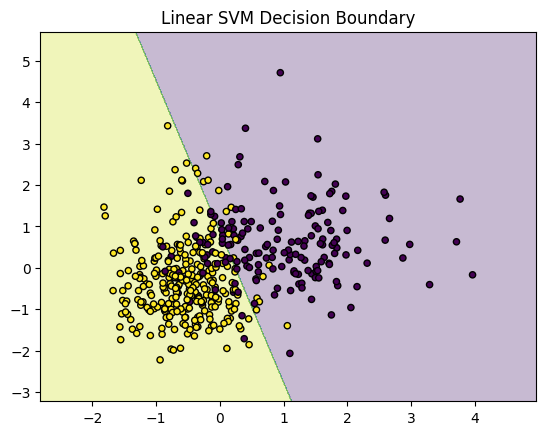

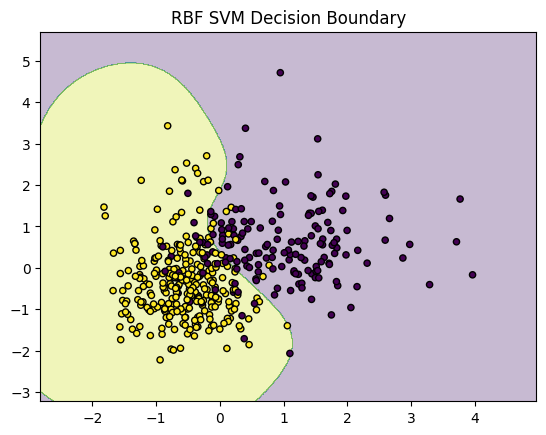

In [8]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svm, X_train_scaled, y_train, "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_svm, X_train_scaled, y_train, "RBF SVM Decision Boundary")
